<a href="https://colab.research.google.com/github/NBN879/ML_course_from_Innopolis/blob/master/%D0%94%D0%97_%E2%84%962_2024_07_17_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведите анализ двух датасетов на выбор с использованием линейной или логистической регрессии.

Датасеты на выбор:
1.   Boston Housing (Линейная регрессия)
2.   Titanic (Логистическая регрессия)

Требования:
1.   Метрики оценки моделей:
*   Для линейной регрессии: MSE, R².
*   Для логистической регрессии: Accuracy, Precision, Recall, F1-Score, ROC-AUC.

2.   Линейная регрессия (если выбран Boston Housing):
*   Проведите предобработку данных.
*   Обучите модель линейной регрессии и оцените её качество.
*   Визуализируйте результаты.

3.   Логистическая регрессия (если выбран Titanic):
*   Проведите предобработку данных.
*   Обучите модель логистической регрессии и оцените её качество.
*   Визуализируйте результаты и постройте ROC-кривую.


# Линейная регрессия для "Boston Housing" 🏠



**Подключение библиотек и скриптов**

In [69]:
# Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Разделение датасета
from sklearn.model_selection import train_test_split

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [70]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [74]:
DATASET_PATH = './boston_housing.csv' # "сырой" датасет
PREPARED_DATASET_PATH = './boston_housing_prepared.csv' # сохраненный готовый датасет

## Загрузка данных

**Описание датасета**

Набор данных о жилье в Бостоне основан на информации, собранной Службой переписи населения США о жилье в районе Бостона, Массачусетс. Ниже описаны столбцы набора данных:

**CRIM** - уровень преступности на душу населения.

**ZN** – доля жилых земель, зонированных на участки площадью более 25 000 кв. футов.

**INDUS** - доля площадей под неторговую деятельность на город.

**CHAS** — фиктивная переменная реки Чарльз (1, если тракт ограничивает реку; 0 в противном случае).

**NOX** - концентрация оксидов азота (частей на 10 миллионов).

**RM** - среднее количество комнат в жилом помещении.

**AGE** - доля квартир, занимаемых владельцами, построенных до 1940 г.

**DIS** – взвешенные расстояния до пяти центров занятости Бостона.

**RAD** - индекс доступности радиальных автомобильных дорог.

**TAX** — ставка налога на имущество в размере полной стоимости за 10 000 долларов США.

**PTRATIO** - соотношение учеников и учителей.

**B** - 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам.

**LSTAT** - % более низкого статуса населения.

**MEDV** — Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США.

In [75]:
df = pd.read_csv(DATASET_PATH)
# df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [77]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


**Оставим признаки, которые необходимы для модели**

In [78]:
df.columns.tolist()

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [79]:
feature_names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
target_name = 'medv'

In [80]:
df = df[feature_names + [target_name]]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Стандартизация признаков**

In [81]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64']).columns.tolist()
feature_names_for_stand

['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'b', 'lstat']

In [82]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min)
# StandardScaler() Для каждой фичи х делает: (x - mean) / std
# RobustScaler() Для каждой фичи х делает: (x - median) / (q75 - q25)

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [83]:
stand_features

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [84]:
stand_features.shape

(506, 10)

In [85]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [86]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,1,296,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,2,242,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,2,242,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,3,222,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,3,222,0.113032,0.441052,-1.026501,36.2


## Сохранение датасета

In [87]:
#df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

## Разбиение на обучающую (train) и тестовую (test) выборки

In [88]:
X = df[feature_names]
y = df[target_name]

# обучающая выборка = 70%, тестовая (test_size) = 30%
# shuffle=True - перед разделением данные необходимо перемешать
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42)

In [89]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,-0.417044,-0.487722,-1.306878,0,-0.835284,0.207096,-0.351157,1.077737,3,222,0.113032,0.410571,-1.043322
116,-0.405205,-0.487722,-0.164408,0,-0.066472,-0.154767,0.139579,-0.506241,6,432,-0.303094,0.401580,-0.085935
45,-0.400569,-0.487722,-0.616727,0,-0.921667,-0.858548,-1.236615,0.620527,3,233,-0.256858,0.441052,-0.342453
16,-0.297868,-0.487722,-0.437258,0,-0.144217,-0.498110,-1.396638,0.334449,4,307,1.176466,0.330860,-0.851284
468,1.392077,-0.487722,1.015999,0,0.218592,-0.510932,0.086238,-0.421483,24,666,0.806576,0.132296,0.767723


## Построение моделей

In [90]:
%matplotlib inline
def evaluate_preds(true_values, pred_values):
    """Оценка качества модели и график preds vs true"""

    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )

    plt.figure(figsize=(8,8))

    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 51], [0, 51], linestyle='--', color='black')  # диагональ, где true_values = pred_values

    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    plt.show()

R2:	0.743
RMSE:	4.748
MSE:	22.545


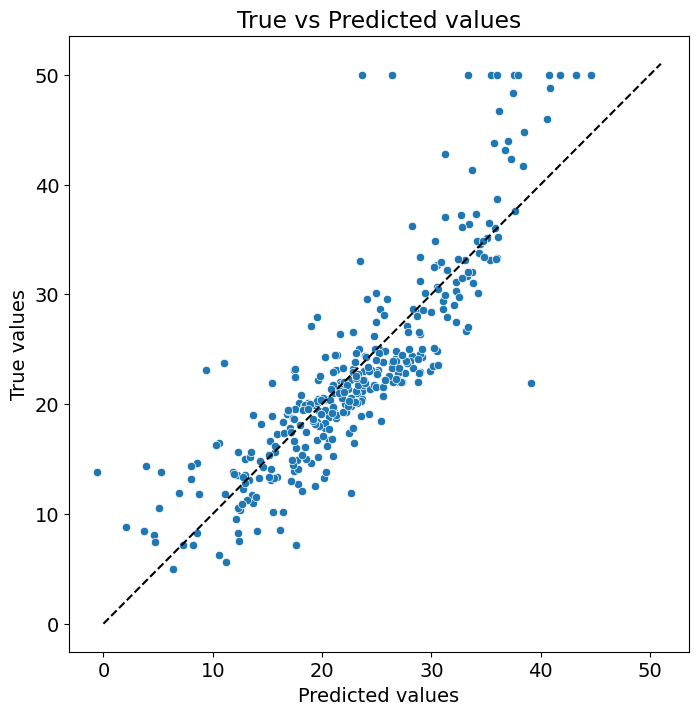

In [91]:
# Модель линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказание на обучающей выборке
y_train_preds = lr_model.predict(X_train)

# Постпроцессинг
#y_train_preds = np.clip(y_train_preds, a_min=5, a_max=50)

evaluate_preds(y_train, y_train_preds)

R2:	0.711
RMSE:	4.639
MSE:	21.517


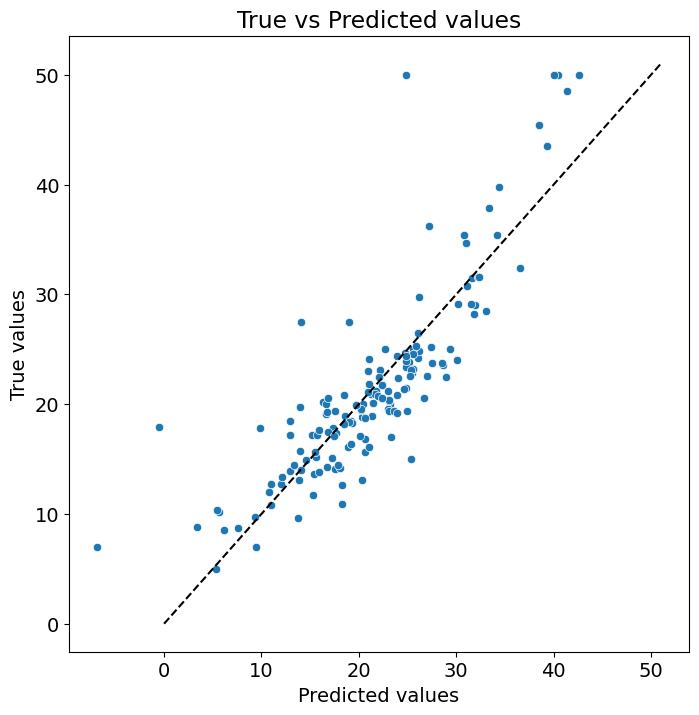

In [92]:
# Предсказание на тестовой выборке
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
#y_test_preds = np.clip(y_test_preds, a_min=5, a_max=50)

evaluate_preds(y_test, y_test_preds)